In [50]:
import librosa

In [51]:
audio_file_path='dataset/crowd2/crowd000.wav'

In [52]:
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [53]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.0660116  0.08711506 0.        ]


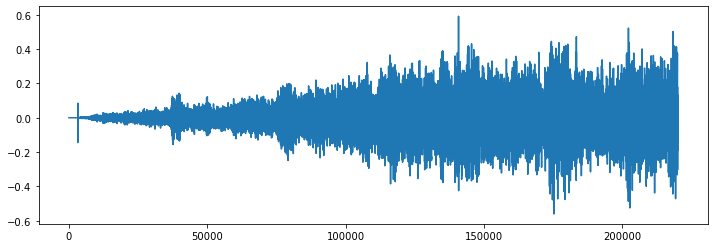

In [54]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [55]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [56]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [2863, 2480],
       [2912, 2378],
       [2730, 2314]], dtype=int16)

In [57]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [58]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 430)


In [59]:
mfccs

array([[-5.7742078e+02, -5.7742078e+02, -5.7742078e+02, ...,
        -9.5862114e+01, -9.1393509e+01, -8.6218842e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.6261545e+02,  1.6620590e+02,  1.5852182e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.1211176e+00, -1.1855700e+01, -1.0752502e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.4178162e+00,  5.7471991e-03, -7.2214909e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.1286964e+00,  1.2163355e+00, -2.3503079e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.8874853e-01,  1.9743471e+00,  4.4259720e+00]], dtype=float32)

In [60]:
import pandas as pd
import os

audio_dataset_path='dataset/'
metadata=pd.read_csv('dataset/info.csv')
metadata.head()

slice_file_name  classID
0       speech0/SanjayDutt_5_rs.wav        0
1               crowd2/crowd269.wav        1
2               crowd2/crowd251.wav        1
3  speech0/ApporvaBajpayee_2_rs.wav        0
4               crowd2/crowd024.wav        1

In [61]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [62]:
import numpy as np
from tqdm import tqdm

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),row["slice_file_name"].split("/")[0],row["slice_file_name"].split("/")[1])
    final_class_labels=row["classID"]
    print(file_name,final_class_labels)

0it [00:00, ?it/s]

C:\Users\danis\Untitled Folder\manthan\dataset\speech0\SanjayDutt_5_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd269.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd251.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\ApporvaBajpayee_2_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd024.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white219.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd033.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd331.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\SnehaSoni_4_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white294.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white010.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd109.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white099.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd094.wav 1
C:\Use

613it [00:00, 4663.13it/s]

 0
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\DebomitraDas_2_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\AnamAquil_6_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white117.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white238.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\AkshayKumar_3_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd332.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\Vaibhav_5_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\Vaibhav_2_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\Vaibhav_4_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white106.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\NutanBhatnagar_5_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white095.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\SavanA_2_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\data

1111it [00:00, 4427.55it/s]

C:\Users\danis\Untitled Folder\manthan\dataset\speech0\SiddharthSingh_6_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd110.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\PalakSharma_2_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white022.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd304.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white355.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd360.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white170.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\white1\white178.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\AmitSingh_3_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\AkanshaSingh_6_rs.wav 0
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd143.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\crowd2\crowd123.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\speech0\AbhimanyuB

1610it [00:00, 4521.19it/s]

 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out065.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out066.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out067.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out068.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out069.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out070.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out071.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out072.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out073.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out074.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out075.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out076.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out077.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out078.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out079.wav 1
C:\Users\danis\Untitle

2042it [00:00, 4710.88it/s]

 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out372.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out373.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out374.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out375.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out376.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out377.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out378.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out379.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out380.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out381.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out382.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out383.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out384.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out385.wav 1
C:\Users\danis\Untitled Folder\manthan\dataset\moar\out386.wav 1
C:\Users\danis\Untitle

In [63]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),row["slice_file_name"].split("/")[0],row["slice_file_name"].split("/")[1])
    final_class_labels=row["classID"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2042it [04:20,  7.83it/s]


In [82]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature  class
0  [-386.5961, 137.2683, -1.4700845, 14.661314, -...      0
1  [-119.777245, 156.27466, -20.965727, 27.654732...      1
2  [-108.593765, 162.42679, -23.12998, 24.480637,...      1
3  [-327.61255, 141.8547, -47.656612, 31.17433, -...      0
4  [-130.72876, 168.33388, -20.432158, 26.344992,...      1

In [83]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [84]:
X.shape

(2042, 40)

In [85]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [86]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [69]:
y.shape

(2042, 2)

In [88]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
X_train.shape

(1633, 40)

In [91]:
y_train.shape

(1633, 2)

In [92]:
X_test.shape

(409, 40)

In [93]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [95]:
num_labels=y.shape[1]

In [96]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))



###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4100      
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               20200     
                                                                 
 activation_13 (Activation)  (None, 200)               0         
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [98]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [99]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
45/52 [========================>.....] - ETA: 0s - loss: 9.8766 - accuracy: 0.6194 
Epoch 1: val_loss improved from inf to 0.33286, saving model to saved_models\audio_classification.hdf5
52/52 [==============================] - 1s 7ms/step - loss: 9.1683 - accuracy: 0.6283 - val_loss: 0.3329 - val_accuracy: 0.9193
Epoch 2/100
29/52 [===============>..............] - ETA: 0s - loss: 2.9477 - accuracy: 0.7489
Epoch 2: val_loss improved from 0.33286 to 0.16638, saving model to saved_models\audio_classification.hdf5
52/52 [==============================] - 0s 3ms/step - loss: 2.4295 - accuracy: 0.7685 - val_loss: 0.1664 - val_accuracy: 0.9707
Epoch 3/100
48/52 [==========================>...] - ETA: 0s - loss: 0.8665 - accuracy: 0.8574
Epoch 3: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.8585 - val_loss: 0.2008 - val_accuracy: 0.9731
Epoch 4/100
48/52 [==========================>...] - ETA: 0s - loss: 0

Epoch 31/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0056 - accuracy: 0.9987  
Epoch 31: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.3853 - val_accuracy: 0.9976
Epoch 32/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0126 - accuracy: 0.9954  
Epoch 32: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.3814 - val_accuracy: 0.9976
Epoch 33/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0127 - accuracy: 0.9969  
Epoch 33: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.3787 - val_accuracy: 0.9976
Epoch 34/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0119 - accuracy: 0.9974  
Epoch 34: val_loss did not improve from 0.16638
52/52 [======================

Epoch 61/100
31/52 [================>.............] - ETA: 0s - loss: 0.0074 - accuracy: 0.9980    
Epoch 61: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.5033 - val_accuracy: 0.9976
Epoch 62/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0083 - accuracy: 0.9974  
Epoch 62: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.5166 - val_accuracy: 0.9976
Epoch 63/100
30/52 [================>.............] - ETA: 0s - loss: 0.0020 - accuracy: 0.9990    
Epoch 63: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9988 - val_loss: 0.5439 - val_accuracy: 0.9976
Epoch 64/100
29/52 [===============>..............] - ETA: 0s - loss: 0.0038 - accuracy: 0.9978    
Epoch 64: val_loss did not improve from 0.16638
52/52 [================

Epoch 91/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0089 - accuracy: 0.9960
Epoch 91: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9963 - val_loss: 0.5591 - val_accuracy: 0.9976
Epoch 92/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0041 - accuracy: 0.9994  
Epoch 92: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.5635 - val_accuracy: 0.9976
Epoch 93/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994
Epoch 93: val_loss did not improve from 0.16638
52/52 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.6050 - val_accuracy: 0.9976
Epoch 94/100
49/52 [===========================>..] - ETA: 0s - loss: 8.5508e-04 - accuracy: 1.0000
Epoch 94: val_loss did not improve from 0.16638
52/52 [========================

In [81]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [ ]:
X_test[1]

In [ ]:
np.argmax(model.predict(X_test), axis=-1)

In [ ]:
filename="VOIdasdasdasdasdCE.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
np.argmax(model.predict(prediction_feature), axis=-1)

In [104]:
filename="test_noise.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)

1/1 [==============================] - 0s 16ms/step
[0]
